In [61]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from astropy.table import Table, Column
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [69]:
tidx = 2
inpath = '/home/aes/git/ashao_forks/MOM6-examples/ice_ocean_SIS2/Mediterranean_z_05/'
off_file = inpath + '00020101.off_diag.nc'
# on_snap_file = inpath + 'ONLINE/00010101.off_snap_z_1day.nc'
# on_sum_file = inpath + 'ONLINE/00010101.off_sum_z_1day.nc'
on_snap_file = inpath + 'ONLINE/gaea/00030101.off_snap_1day_z.nc'
on_sum_file = inpath + 'ONLINE/gaea/00030101.off_sum_1day_z.nc'
area = nc.Dataset(off_file).variables['area_t'][:,:]
nz = 50

In [70]:
lon = nc.Dataset(off_file).variables['xh'][:]
lat = nc.Dataset(off_file).variables['yh'][:]
eta_diff = nc.Dataset(off_file).variables['eta_diff'][tidx,:,:]
uhr = nc.Dataset(off_file).variables['uhr_redist'][tidx,:,:,:].data
vhr = nc.Dataset(off_file).variables['vhr_redist'][tidx,:,:,:].data
hr = nc.Dataset(off_file).variables['h_redist'][tidx,:,:,:].data
hstart = nc.Dataset(on_snap_file).variables['h_end'][tidx,:,:,:].data
hend = nc.Dataset(on_snap_file).variables['h_end'][tidx,:,:,:].data
uhtr = nc.Dataset(on_sum_file).variables['uhtr_sum'][tidx,:,:,:].data
vhtr = nc.Dataset(on_sum_file).variables['vhtr_sum'][tidx,:,:,:].data

In [71]:
uhtr_conv = np.zeros_like(uhtr)
uhtr_conv[:,:,0] = uhtr[:,:,0]
uhtr_conv[:,:,1:] = uhtr[:,:,0:-1] - uhtr[:,:,1:]
vhtr_conv = np.zeros_like(vhtr)
vhtr_conv[:,0,:] = vhtr[:,0,:]
vhtr_conv[:,1:,:] = vhtr[:,0:-1,:] - vhtr[:,1:,:]
tot_conv = uhtr_conv.sum(axis=0) + vhtr_conv.sum(axis=0)

uhr_conv = np.zeros_like(uhr)
uhr_conv[:,:,0] = uhr[:,:,0]
uhr_conv[:,:,1:] = uhr[:,:,0:-1] - uhr[:,:,1:]
vhr_conv = np.zeros_like(vhr)
vhr_conv[:,0,:] = vhr[:,0,:]
vhr_conv[:,1:,:] = vhr[:,0:-1,:] - vhr[:,1:,:]
tot_rconv = uhr_conv.sum(axis=0) + vhr_conv.sum(axis=0)

<IPython.core.display.Javascript object>


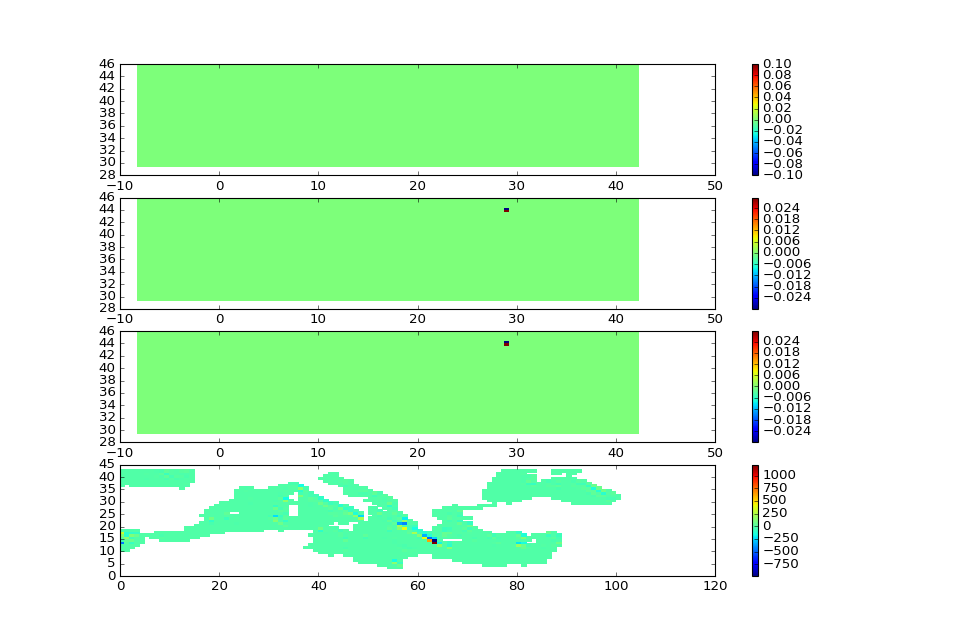

In [72]:
plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.pcolormesh(lon,lat,uhr_conv.sum(axis=0)/area); plt.colorbar()
plt.subplot(4,1,2)

plt.pcolormesh(lon,lat,vhr_conv.sum(axis=0)/area); plt.colorbar()
plt.subplot(4,1,3)
plt.pcolormesh(lon,lat,(tot_rconv)/area); plt.colorbar()
plt.subplot(4,1,4)
plt.pcolormesh(eta_diff); plt.colorbar()

<IPython.core.display.Javascript object>


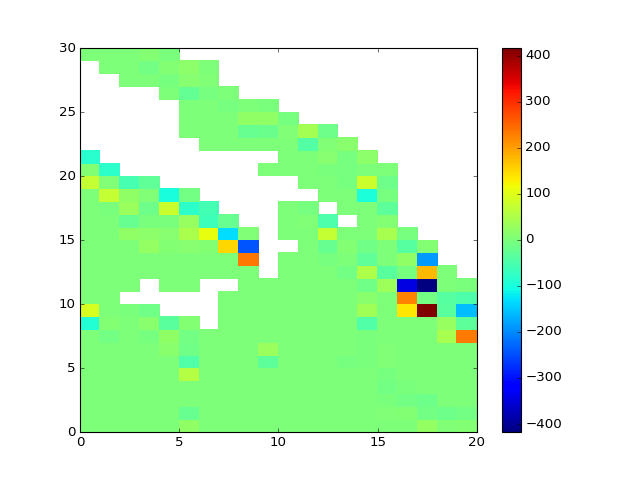

In [73]:
plt.figure()
plt.pcolormesh(eta_diff[10:40,40:60]); plt.colorbar()

In [53]:
i = 50
j = 22
point = Table()
point['k'] = np.arange(1,36)
point['eta'] = hstart[:,j,i].cumsum()
point['h(i-1)'] = hstart[:,j,i-1]
point['h'] = hstart[:,j,i]
point['h(i+1)'] = hstart[:,j,i+1]
point['UH(I-1)'] = uhtr[:,j,i-1]/area[j,i-1]
point['UH(I)'] = uhtr[:,j,i]/area[j,i]
point['VH(J)'] = vhtr[:,j,i]/area[j,i]
point['VH(J-1)'] = vhtr[:,j-1,i]/area[j-1,i]
point['eta_r'] = hr[:,j,i].cumsum()
point['hr(i-1)'] = hr[:,j,i-1]
point['hr'] = hr[:,j,i]
point['hr(i+1)'] = hr[:,j,i+1]
point['UHR(I-1)'] = uhr[:,j,i-1]/area[j,i-1]
point['UHR(I)'] = uhr[:,j,i]/area[j,i]
point['VHR(J-1)'] = vhr[:,j-1,i]/area[j-1,i]
point['VHR(J)'] = vhr[:,j,i]/area[j,i]
point['hend(i-1)'] = hend[:,j,i-1]
point['hend'] = hend[:,j,i]
point['hend(i+1)'] = hend[:,j,i+1]
point['eta_end'] = hend[:,j,i].cumsum()
np.set_printoptions(precision=4)
# point['VHR(I-1)'] = vhr[:,j-1,i]
# point['VHR(I)'] = vhr[:,j,i]
point.show_in_notebook(display_length=25)

k,eta,h(i-1),h,h(i+1),UH(I-1),UH(I),VH(J),VH(J-1),eta_r,hr(i-1),hr,hr(i+1),UHR(I-1),UHR(I),VHR(J-1),VHR(J),hend(i-1),hend,hend(i+1),eta_end
1,4.99889239042,0.0,4.99889239042,4.99963352037,0.0,0.346244829556,0.776920057414,0.514666647343,4.99888201798,0.0,4.99888201798,4.99963686722,0.0,0.0,0.0,0.0,0.0,4.99889239042,4.99963352037,4.99889239042
2,14.9966771713,0.0,9.99778478084,9.99926704074,0.0,0.722567275324,1.03352299556,1.0370598181,14.9966460539,0.0,9.99776403596,9.99927373444,0.0,0.0,0.0,0.0,0.0,9.99778478084,9.99926704074,14.9966771713
3,24.9944619521,0.0,9.99778478084,9.99926704074,0.0,0.550156420182,0.994950660189,1.20547054736,24.9944100899,0.0,9.99776403596,9.99927373444,0.0,0.0,0.0,0.0,0.0,9.99778478084,9.99926704074,24.9944619521
4,39.9911391234,0.0,14.9966771713,14.9989005611,0.0,0.615296481343,1.4997987151,1.8394053513,39.9910561438,0.0,14.9966460539,14.9989106017,0.0,0.0,0.0,0.0,0.0,14.9966771713,14.9989005611,39.9911391234
5,62.4861548803,0.0,22.4950157569,22.4983508417,0.0,0.635889610583,2.04262578002,2.5900200794,62.4860252247,0.0,22.4949690809,22.4983659025,0.0,0.0,0.0,0.0,0.0,22.4950157569,22.4983508417,62.4861548803
6,87.4806168324,0.0,24.9944619521,24.9981676019,0.0,1.43283221398,6.96622014318,2.92160765849,87.4804353146,0.0,24.9944100899,24.9981843361,0.0,0.0,0.0,0.0,0.0,24.9944619521,24.9981676019,87.4806168324
7,112.475078784,0.0,24.9944619521,24.9981676019,0.0,2.03339379057,-0.045981944916,2.17248949495,112.474845404,0.0,24.9944100899,24.9981843361,0.0,0.0,0.0,0.0,0.0,24.9944619521,24.9981676019,112.475078784
8,137.469540737,0.0,24.9944619521,24.9981676019,0.0,1.71037214627,0.0,1.76499145458,137.469255494,0.0,24.9944100899,24.9981843361,0.0,0.0,0.0,0.0,0.0,24.9944619521,24.9981676019,137.469540737
9,174.961233665,0.0,37.4916929282,37.4972514028,0.0,2.05135944952,0.0,2.02889087254,174.960870629,0.0,37.4916151348,37.4972765041,0.0,0.0,0.0,0.0,0.0,37.4916929282,37.4972514028,174.961233665
10,224.950157569,0.0,49.9889239042,49.9963352037,0.0,2.34989335812,0.0,2.47672822497,224.949690809,0.0,49.9888201798,49.9963686722,0.0,0.0,0.0,0.0,0.0,49.9889239042,49.9963352037,224.950157569


In [ ]:
point.show_in_notebook?

In [ ]:
k=np.arange(1,36)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(uhtr_conv[:,j,i],k, label='UH Conv',marker='x')
plt.plot(vhtr_conv[:,j,i],k, label='VH Conv',marker='x')
plt.legend(loc=3)
plt.gca().invert_yaxis()
plt.subplot(2,2,2)
plt.plot(uhtr[:,j,i],k, label='UH(I)',marker='x')
plt.plot(uhtr[:,j,i-1],k, label='UH(I-1)',marker='x')
plt.plot(vhtr[:,j,i],k, label='VH(J)',marker='x')
plt.plot(vhtr[:,j-1,i],k, label='VH(J-1)',marker='x')
plt.legend(loc=3)
plt.gca().invert_yaxis()
plt.subplot(2,2,3)
plt.plot(hr[:,j,i].cumsum(),k, label='hr',marker='x')
plt.plot(hend[:,j,i].cumsum(),k,label='hend',marker='x')
plt.legend(loc=3)
plt.gca().invert_yaxis()
plt.subplot(2,2,4)
plt.plot(hstart[:,j,i],k, label='hr(i)',marker='x')
plt.plot(hstart[:,j-1,i],k, label='hr(i+1)',marker='x')
plt.legend(loc=3)
plt.gca().invert_yaxis()

In [ ]:
plt.figure()
plt.scatter(uhr_conv[:,j,i],uhtr_conv[:,j,i])
plt.grid()
plt.xlim(-1e12,1e12)
plt.ylim(-1e12,1e12)


In [ ]:
p

In [ ]:
tot_conv = uhtr_conv+vhtr_conv

In [ ]:
print(tot_conv[:,j,i].sum()/area[j,i])